# VERİ HAZIRLAMA

In [2]:
import pandas as pd
import numpy as np

In [3]:
veriler = pd.read_csv('train.csv', parse_dates=['Tarih'])

In [4]:
veriler.isna().sum()
veriler.describe()
veriler.info()
veriler.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40152 entries, 0 to 40151
Data columns (total 2 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Tarih                   40152 non-null  datetime64[ns]
 1   Dağıtılan Enerji (MWh)  40152 non-null  float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 627.5 KB


,Tarih,Dağıtılan Enerji (MWh)
0,2018-01-01 00:00:00,1593.944216
1,2018-01-01 01:00:00,1513.933887
2,2018-01-01 02:00:00,1402.612637
3,2018-01-01 03:00:00,1278.527266
4,2018-01-01 04:00:00,1220.697701


In [5]:
veriler = veriler.rename(columns={"Dağıtılan Enerji (MWh)" : "DE"})

In [6]:
veriler.head()

,Tarih,DE
0,2018-01-01 00:00:00,1593.944216
1,2018-01-01 01:00:00,1513.933887
2,2018-01-01 02:00:00,1402.612637
3,2018-01-01 03:00:00,1278.527266
4,2018-01-01 04:00:00,1220.697701


In [7]:
veriler['Gün'] = veriler['Tarih'].dt.dayofweek
veriler["GünSırası"]=veriler["Tarih"].dt.day
veriler['Ay'] = veriler['Tarih'].dt.month
veriler['Yıl'] = veriler['Tarih'].dt.year
veriler['Saat'] = veriler['Tarih'].dt.hour
veriler['Mevsim'] = (veriler['Tarih'].dt.month % 12 + 3) // 3
veriler['Hafta Sonu'] = veriler['Gün'].apply(lambda x: 1 if x in [5, 6] else 0)
veriler['Gece'] = veriler['Saat'].apply(lambda x: 1 if x in [18,19,20,21,22,23,0,1,2,3,4,5] else 0)

In [8]:
def add_quality(Saat):
    if 0<=Saat and Saat <=4: 
        return 0
    elif Saat>20:
        return 0
    elif 11<Saat and Saat<=12:
        return 0
    elif 6<Saat and Saat<=11:
        return 1
    elif 12<Saat and Saat<=14:
        return 1
    elif 5<=Saat and Saat<=6:
        return 2
    elif 14<Saat and Saat<=20:
        return 2
    
veriler["Artmış Mı"] = veriler["Saat"].apply(add_quality)

In [9]:
veriler.head(24000)
#veriler.info()

,Tarih,DE,Gün,GünSırası,Ay,Yıl,Saat,Mevsim,Hafta Sonu,Gece,Artmış Mı
0,2018-01-01 00:00:00,1593.944216,0,1,1,2018,0,1,0,1,0
1,2018-01-01 01:00:00,1513.933887,0,1,1,2018,1,1,0,1,0
2,2018-01-01 02:00:00,1402.612637,0,1,1,2018,2,1,0,1,0
3,2018-01-01 03:00:00,1278.527266,0,1,1,2018,3,1,0,1,0
4,2018-01-01 04:00:00,1220.697701,0,1,1,2018,4,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
23995,2020-09-26 19:00:00,2125.575504,5,26,9,2020,19,4,1,1,2
23996,2020-09-26 20:00:00,2070.230938,5,26,9,2020,20,4,1,1,2
23997,2020-09-26 21:00:00,1960.334625,5,26,9,2020,21,4,1,1,0
23998,2020-09-26 22:00:00,1862.313947,5,26,9,2020,22,4,1,1,0


In [10]:
veriler = veriler.drop('Tarih', axis=1)
veriler= veriler.astype(float)
veri_yedek= veriler
veriler.head(24000)
#veriler.info()

,DE,Gün,GünSırası,Ay,Yıl,Saat,Mevsim,Hafta Sonu,Gece,Artmış Mı
0,1593.944216,0.0,1.0,1.0,2018.0,0.0,1.0,0.0,1.0,0.0
1,1513.933887,0.0,1.0,1.0,2018.0,1.0,1.0,0.0,1.0,0.0
2,1402.612637,0.0,1.0,1.0,2018.0,2.0,1.0,0.0,1.0,0.0
3,1278.527266,0.0,1.0,1.0,2018.0,3.0,1.0,0.0,1.0,0.0
4,1220.697701,0.0,1.0,1.0,2018.0,4.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
23995,2125.575504,5.0,26.0,9.0,2020.0,19.0,4.0,1.0,1.0,2.0
23996,2070.230938,5.0,26.0,9.0,2020.0,20.0,4.0,1.0,1.0,2.0
23997,1960.334625,5.0,26.0,9.0,2020.0,21.0,4.0,1.0,1.0,0.0
23998,1862.313947,5.0,26.0,9.0,2020.0,22.0,4.0,1.0,1.0,0.0


# VERİ GÖRSELLEŞTİRME

In [17]:
import matplotlib.pyplot as plt

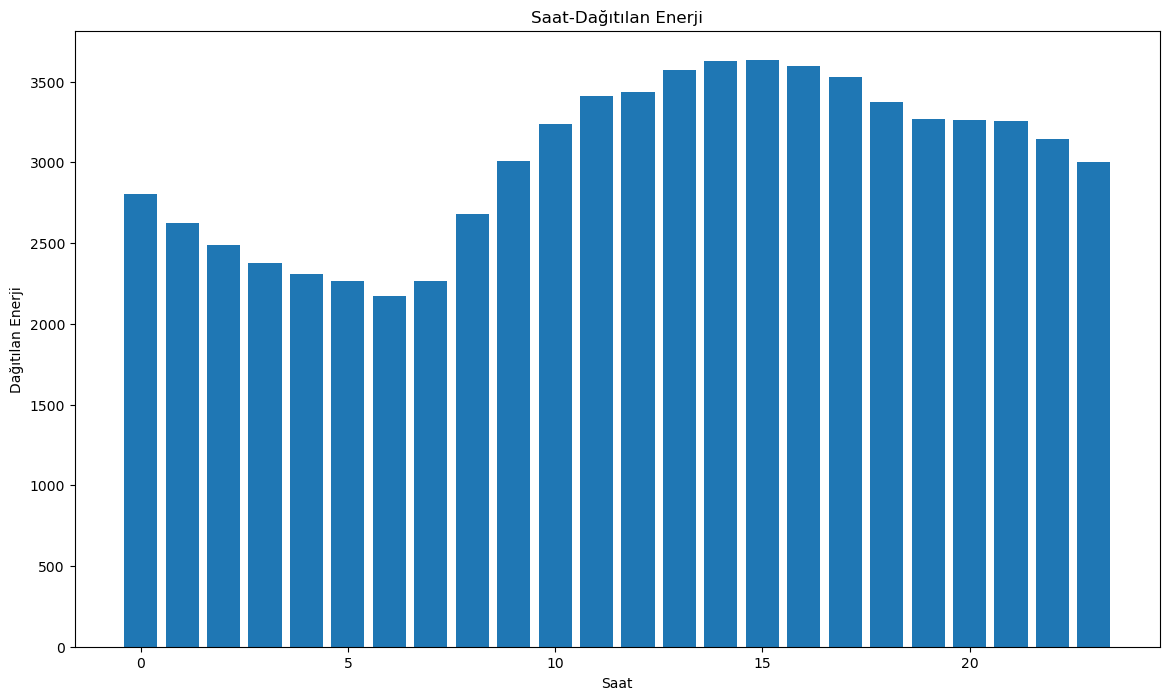

In [81]:
"""2018 YILI -- veri2018 = veriler[veriler['Yıl'] == 2018]"""
# Grafik boyutunu belirle
fig, ax = plt.subplots(figsize=(14, 8))
# İki sütun arasındaki ilişkiyi gösteren bir scatter plot oluştur
ax.bar(veriler['Saat'], veriler['DE'])
ax.set_xlabel('Saat')
ax.set_ylabel('Dağıtılan Enerji')
ax.set_title('Saat-Dağıtılan Enerji')
plt.show()

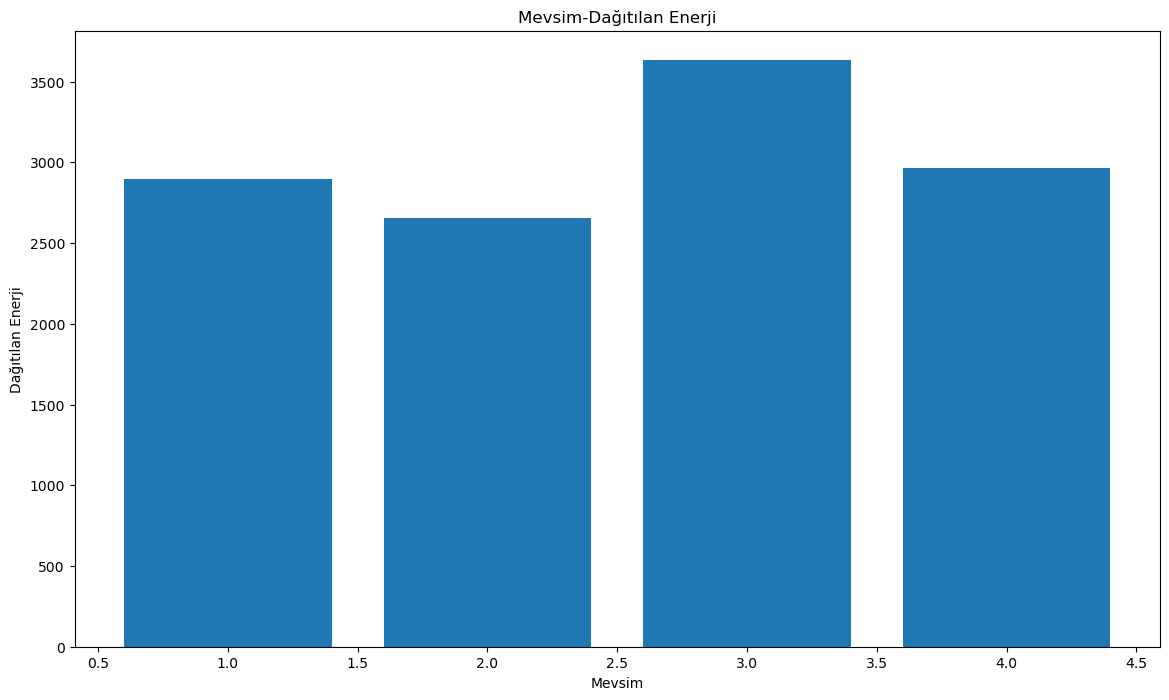

In [78]:
# Grafik boyutunu belirle
fig, ax = plt.subplots(figsize=(14, 8))
# İki sütun arasındaki ilişkiyi gösteren bir scatter plot oluştur
ax.bar(veriler['Mevsim'], veriler['DE'])
ax.set_xlabel('Mevsim')
ax.set_ylabel('Dağıtılan Enerji')
ax.set_title('Mevsim-Dağıtılan Enerji')
plt.show()

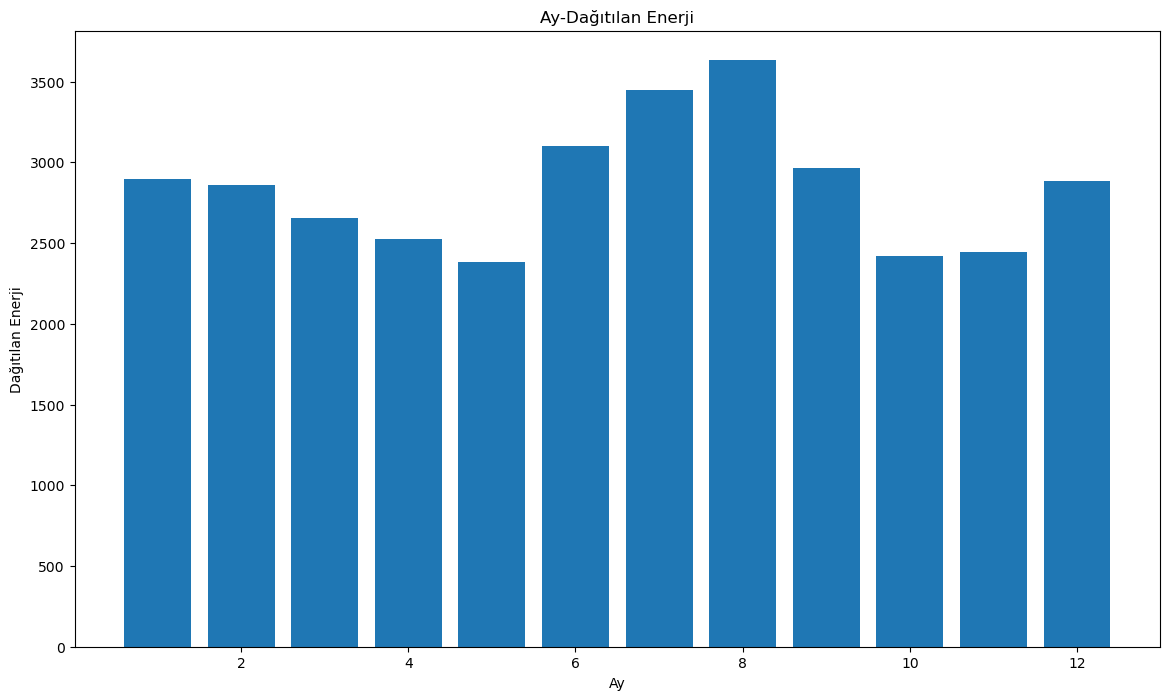

In [82]:
# Grafik boyutunu belirle
fig, ax = plt.subplots(figsize=(14, 8))
# İki sütun arasındaki ilişkiyi gösteren bir scatter plot oluştur
ax.bar(veriler['Ay'], veriler['DE'])
ax.set_xlabel('Ay')
ax.set_ylabel('Dağıtılan Enerji')
ax.set_title('Ay-Dağıtılan Enerji')
plt.show()

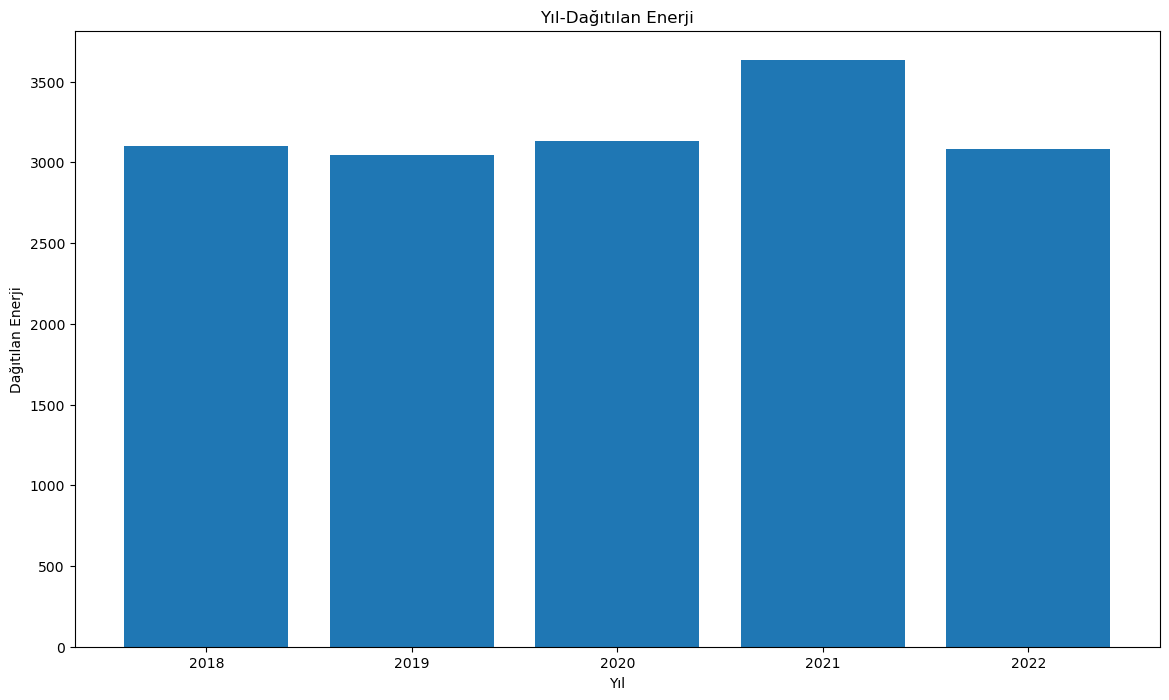

In [83]:
# Grafik boyutunu belirle
fig, ax = plt.subplots(figsize=(14, 8))
# İki sütun arasındaki ilişkiyi gösteren bir scatter plot oluştur
ax.bar(veriler['Yıl'], veriler['DE'])
ax.set_xlabel('Yıl')
ax.set_ylabel('Dağıtılan Enerji')
ax.set_title('Yıl-Dağıtılan Enerji')
plt.show()

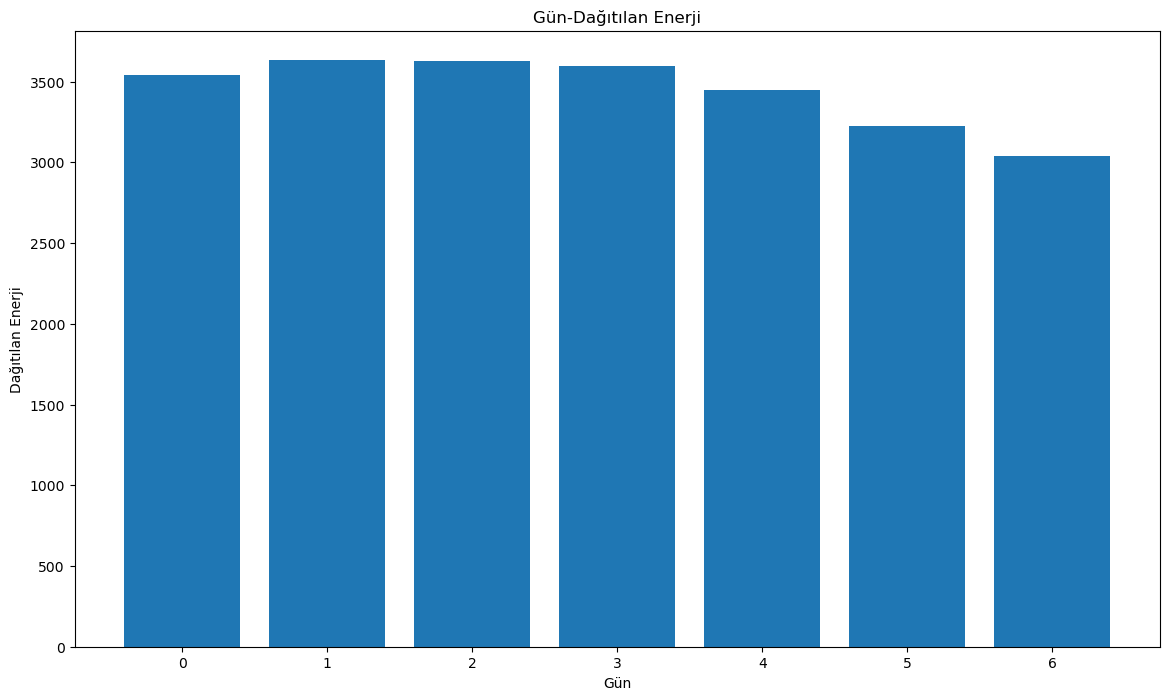

In [84]:
# Grafik boyutunu belirle
fig, ax = plt.subplots(figsize=(14, 8))
# İki sütun arasındaki ilişkiyi gösteren bir scatter plot oluştur
ax.bar(veriler['Gün'], veriler['DE'])
ax.set_xlabel('Gün')
ax.set_ylabel('Dağıtılan Enerji')
ax.set_title('Gün-Dağıtılan Enerji')
plt.show()

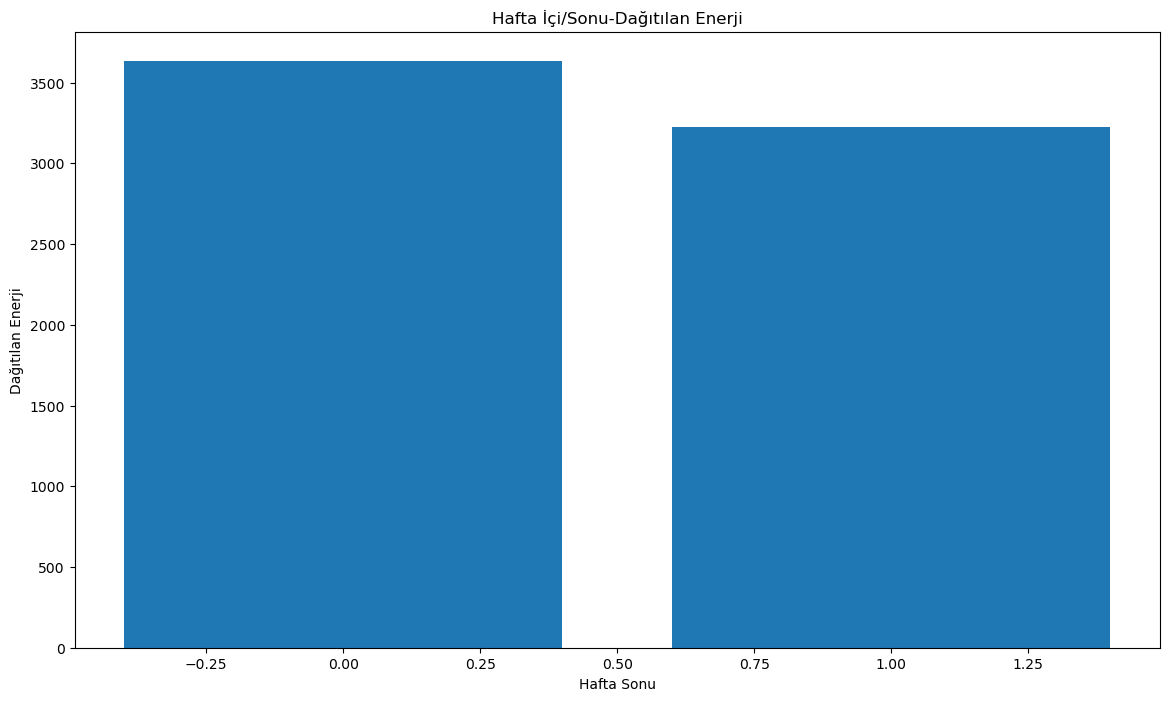

In [85]:
# Grafik boyutunu belirle
fig, ax = plt.subplots(figsize=(14, 8))
# İki sütun arasındaki ilişkiyi gösteren bir scatter plot oluştur
ax.bar(veriler['Hafta Sonu'], veriler['DE'])
ax.set_xlabel('Hafta Sonu')
ax.set_ylabel('Dağıtılan Enerji')
ax.set_title('Hafta İçi/Sonu-Dağıtılan Enerji')
plt.show()

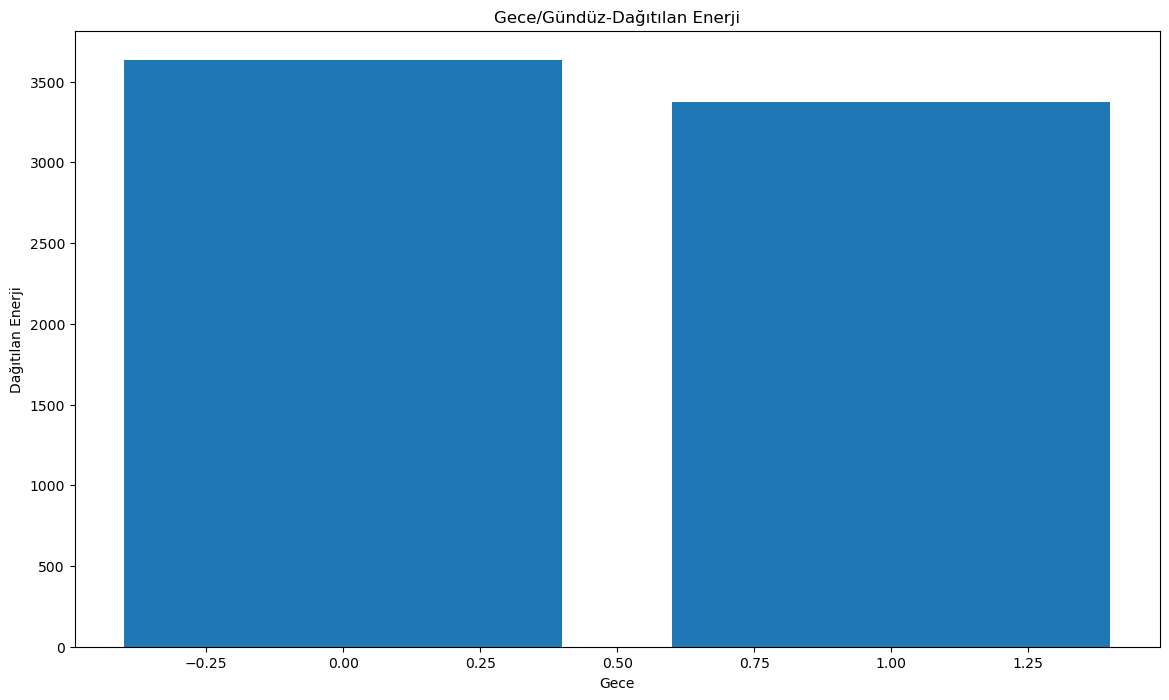

In [86]:
# Grafik boyutunu belirle
fig, ax = plt.subplots(figsize=(14, 8))
# İki sütun arasındaki ilişkiyi gösteren bir scatter plot oluştur
ax.bar(veriler['Gece'], veriler['DE'])
ax.set_xlabel('Gece')
ax.set_ylabel('Dağıtılan Enerji')
ax.set_title('Gece/Gündüz-Dağıtılan Enerji')
plt.show()

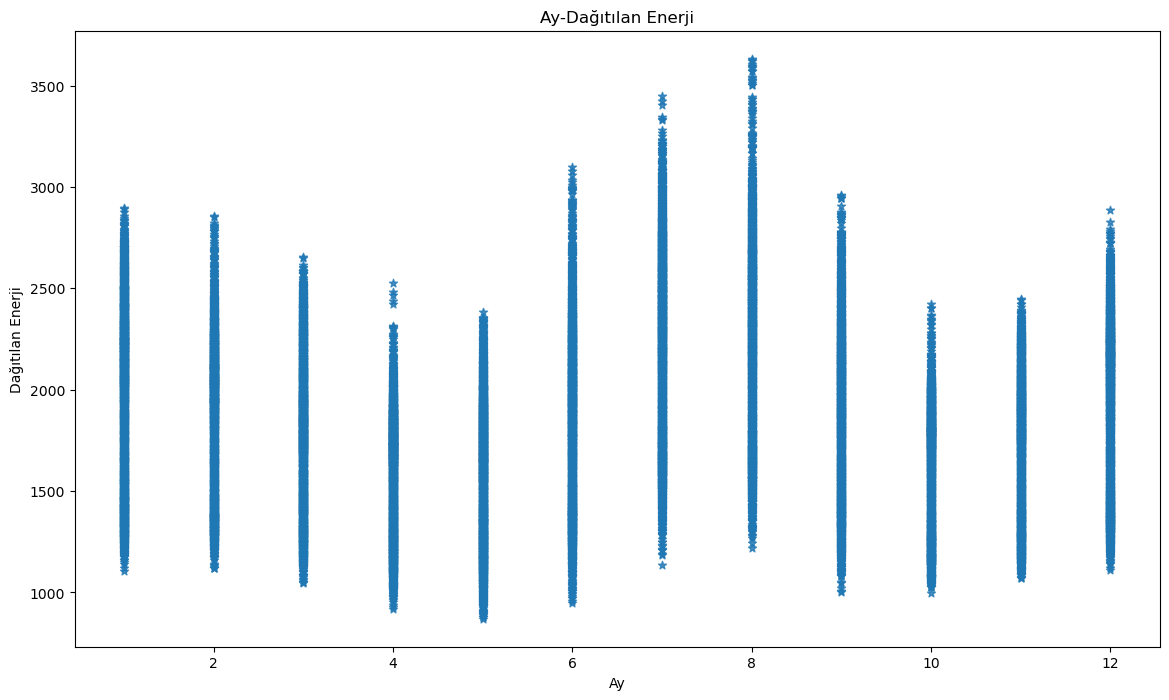

In [88]:
# Grafik boyutunu belirle
fig, ax = plt.subplots(figsize=(14, 8))
# İki sütun arasındaki ilişkiyi gösteren bir scatter plot oluştur
ax.scatter(veriler['Ay'], veriler['DE'], marker='*', alpha=0.8, linewidths=1)
ax.set_xlabel('Ay')
ax.set_ylabel('Dağıtılan Enerji')
ax.set_title('Ay-Dağıtılan Enerji')
plt.show()